In [1]:
# import libraries 
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib import colorbar
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud
from matplotlib.pyplot import figure

import nltk
from nltk import WordNetLemmatizer, pos_tag 
from nltk.corpus import stopwords, wordnet 

from nltk.tokenize import word_tokenize


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

np.random_state = 42

## Temizlenmiş Datasetimizi yüklüyoruz (sd_listinings) 

In [2]:
sd_listings = pd.read_csv('data/sd_listings', index_col= 0)
sd_listings.head(5)

,id,listing_url,latitude,longitude,zipcode,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_id,host_url,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,33159143,https://www.airbnb.com/rooms/33159143,32.91736,-117.07635,92131,"PRIVATE ROOM, SAFE NEIGHBORHOOD IN SCRIPPS RANCH",80% of the house + yourCozy room ... in Scripp...,"Full bed, private bath...",80% of the house + yourCozy room ... in Scripp...,The neighborhood is a typical Southern Califor...,Have alarm system if you choose to use... I wi...,You can park in the drive way or plenty of spa...,"Kitchen, Dining room, Living room, Very Comfor...","I lived in San Diego 40+ years, love to share ...",#NAME?,House,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",1100.0,1100.0,1000.0,0.0,1,0.0,60,90,249661563,https://www.airbnb.com/users/show/249661563,3/18/19,Retired businessman of 30 years in this commun...,within a few hours,100.0,0,Scripps Ranch,1.0,1,0,0,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,strict_14_with_grace_period,0,0
1,17138468,https://www.airbnb.com/rooms/17138468,32.84067,-117.27443,92037,NOT AVAILABLE,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,NaN,NaN,NaN,NaN,NaN,Apartment,Entire home/apt,1,2.0,2.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",1400.0,1400.0,NaN,NaN,1,0.0,30,1125,79755951,https://www.airbnb.com/users/show/79755951,6/24/16,Quiet and considerate.,NaN,0.0,0,La Jolla,1.0,1,0,2,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,strict_14_with_grace_period,0,0
2,21898446,https://www.airbnb.com/rooms/21898446,32.79797,-117.24250,92109,Townhome in Pacific Beach,Hi! We are basically renting this master for a...,NaN,Hi! We are basically renting this master for a...,NaN,NaN,NaN,NaN,NaN,NaN,Townhouse,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",1250.0,1250.0,NaN,NaN,1,0.0,30,30,159773487,https://www.airbnb.com/users/show/159773487,11/22/17,NaN,NaN,0.0,0,Pacific Beach,1.0,1,0,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,flexible,0,0
3,25948680,https://www.airbnb.com/rooms/25948680,32.77545,-117.05923,92120,Spacious furnished 1 BR with tons of amenaties,"All my stuff will be gone. Dishwasher, washer/...",Lobby provides free coffee. Building doors loc...,"All my stuff will be gone. Dishwasher, washer/...",College area,NaN,Across the street from the green line trolly. ...,Everything except second bedroom in apartment....,NaN,NaN,Apartment,Entire home/apt,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Kitchen,""Free pa...",1150.0,1150.0,NaN,NaN,1,0.0,31,40,185758729,https://www.airbnb.com/users/show/185758729,4/22/18,NaN,NaN,0.0,0,College Area,1.0,1,0,0,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,flexible,0,0
4,1756516,https://www.airbnb.com/rooms/1756516,32.84619,-117.27558,92037,A Spacious luxury retreat,"NIcely furnished. Great location, 2 blocks to ...",NaN,"NIcely furnished. Great location, 2 blocks to ...",coastal town great travel destination.,NaN,Bus line near by.,NaN,Call/text business hours.,No pets. Clean and healthy.,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",110.0,110.0,200.0,NaN,1,50.0,180,365,3634860,https://www.air

#### Veri çerçevesini yalnızca metin sütunlarına ayır

In [3]:
sd_listings.columns

Index(['id', 'listing_url', 'latitude', 'longitude', 'zipcode', 'name',
       'summary', 'space', 'description', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'nightly_price', 'price_per_stay',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'host_id', 'host_url', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'neighbourhood_cleansed',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'number_of_reviews', 'number_of_stays',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license',

In [4]:
# get text columns
sd_text = sd_listings[['id', 'listing_url', 'name','summary', 'space', 'description', 
                       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 
                       'house_rules', 'amenities', 'host_about']]

sd_text.head(3)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,amenities,host_about
0,33159143,https://www.airbnb.com/rooms/33159143,"PRIVATE ROOM, SAFE NEIGHBORHOOD IN SCRIPPS RANCH",80% of the house + yourCozy room ... in Scripp...,"Full bed, private bath...",80% of the house + yourCozy room ... in Scripp...,The neighborhood is a typical Southern Califor...,Have alarm system if you choose to use... I wi...,You can park in the drive way or plenty of spa...,"Kitchen, Dining room, Living room, Very Comfor...","I lived in San Diego 40+ years, love to share ...",#NAME?,"{Wifi,Kitchen,""Free parking on premises"",Heati...",Retired businessman of 30 years in this commun...
1,17138468,https://www.airbnb.com/rooms/17138468,NOT AVAILABLE,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,NaN,NaN,NaN,NaN,NaN,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",Quiet and considerate.
2,21898446,https://www.airbnb.com/rooms/21898446,Townhome in Pacific Beach,Hi! We are basically renting this master for a...,NaN,Hi! We are basically renting this master for a...,NaN,NaN,NaN,NaN,NaN,NaN,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",NaN


In [5]:
sd_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13051 entries, 0 to 13050
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     13051 non-null  int64 
 1   listing_url            13051 non-null  object
 2   name                   13051 non-null  object
 3   summary                12635 non-null  object
 4   space                  10080 non-null  object
 5   description            12836 non-null  object
 6   neighborhood_overview  9138 non-null   object
 7   notes                  7103 non-null   object
 8   transit                8261 non-null   object
 9   access                 8224 non-null   object
 10  interaction            8665 non-null   object
 11  house_rules            9587 non-null   object
 12  amenities              13051 non-null  object
 13  host_about             8990 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.5+ MB


## Normalizing and Tokenizing

In [6]:
# import stop words
stop_words = stopwords.words('english')

### Helper function to tokenize columns

In [7]:
# Tokenize edilmemiş belgeyi alır ve tamamen normalleştirilmiş token listesini döndürür.
def process_doc(doc):

    #initialize lemmatizer kelimeleri kök haline indirgiycez
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format. 
    #Bu yardımcı fonksiyon, nltk'nin kelime türü etiketlemelerini (part of speech tagging) WordNet formatına dönüştürür. İşleyişi şu şekildedir:
    #Eğer etiket bir sıfat (adjective) ile başlıyorsa, WordNet sıfat (wordnet.ADJ) olarak döndürülür.
    
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
        
    # Durak kelimelerini (stop words) ve noktalama işaretlerini kaldır, ardından küçük harfe dönüştür.
    doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok not in stop_words)) ]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    #Sonuç üzerindeki POS (kelime türü) tespiti, WordNet'in lemmatizer'ına nasıl lemmatize edileceğini söylemek açısından önemlidir
    # Tokenler ve POS etiketleriyle birlikte, WordNet formatında bir tuple listesi oluşturur.
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
    doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]
    
    return doc_norm

In [8]:
sd_text.head(5)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,amenities,host_about
0,33159143,https://www.airbnb.com/rooms/33159143,"PRIVATE ROOM, SAFE NEIGHBORHOOD IN SCRIPPS RANCH",80% of the house + yourCozy room ... in Scripp...,"Full bed, private bath...",80% of the house + yourCozy room ... in Scripp...,The neighborhood is a typical Southern Califor...,Have alarm system if you choose to use... I wi...,You can park in the drive way or plenty of spa...,"Kitchen, Dining room, Living room, Very Comfor...","I lived in San Diego 40+ years, love to share ...",#NAME?,"{Wifi,Kitchen,""Free parking on premises"",Heati...",Retired businessman of 30 years in this commun...
1,17138468,https://www.airbnb.com/rooms/17138468,NOT AVAILABLE,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,NaN,NaN,NaN,NaN,NaN,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",Quiet and considerate.
2,21898446,https://www.airbnb.com/rooms/21898446,Townhome in Pacific Beach,Hi! We are basically renting this master for a...,NaN,Hi! We are basically renting this master for a...,NaN,NaN,NaN,NaN,NaN,NaN,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",NaN
3,25948680,https://www.airbnb.com/rooms/25948680,Spacious furnished 1 BR with tons of amenaties,"All my stuff will be gone. Dishwasher, washer/...",Lobby provides free coffee. Building doors loc...,"All my stuff will be gone. Dishwasher, washer/...",College area,NaN,Across the street from the green line trolly. ...,Everything except second bedroom in apartment....,NaN,NaN,"{Wifi,""Air conditioning"",Pool,Kitchen,""Free pa...",NaN
4,1756516,https://www.airbnb.com/rooms/1756516,A Spacious luxury retreat,"NIcely furnished. Great location, 2 blocks to ...",NaN,"NIcely furnished. Great location, 2 blocks to ...",coastal town great travel destination.,NaN,Bus line near by.,NaN,Call/text business hours.,No pets. Clean and healthy.,"{TV,Wifi,Kitchen,""Free parking on premises"",El...","Life is too short, enjoy it.....\r\n"


### Eksik girişleri dolduralım

In [9]:
# fill in NaNs with empty text fields
sd_text = sd_text.fillna(' ')
sd_text.head(3)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,amenities,host_about
0,33159143,https://www.airbnb.com/rooms/33159143,"PRIVATE ROOM, SAFE NEIGHBORHOOD IN SCRIPPS RANCH",80% of the house + yourCozy room ... in Scripp...,"Full bed, private bath...",80% of the house + yourCozy room ... in Scripp...,The neighborhood is a typical Southern Califor...,Have alarm system if you choose to use... I wi...,You can park in the drive way or plenty of spa...,"Kitchen, Dining room, Living room, Very Comfor...","I lived in San Diego 40+ years, love to share ...",#NAME?,"{Wifi,Kitchen,""Free parking on premises"",Heati...",Retired businessman of 30 years in this commun...
1,17138468,https://www.airbnb.com/rooms/17138468,NOT AVAILABLE,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,,,,,,,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",Quiet and considerate.
2,21898446,https://www.airbnb.com/rooms/21898446,Townhome in Pacific Beach,Hi! We are basically renting this master for a...,,Hi! We are basically renting this master for a...,,,,,,,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",


In [10]:
sd_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13051 entries, 0 to 13050
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     13051 non-null  int64 
 1   listing_url            13051 non-null  object
 2   name                   13051 non-null  object
 3   summary                13051 non-null  object
 4   space                  13051 non-null  object
 5   description            13051 non-null  object
 6   neighborhood_overview  13051 non-null  object
 7   notes                  13051 non-null  object
 8   transit                13051 non-null  object
 9   access                 13051 non-null  object
 10  interaction            13051 non-null  object
 11  house_rules            13051 non-null  object
 12  amenities              13051 non-null  object
 13  host_about             13051 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.5+ MB


### Veri çerçevesine tokenization (kelimelere ayırma) uygula.

In [11]:
def tokenize_df(df):
    """
    Yardimci fonksiyon, sd_text veri çerçevesindeki her bir sütunu token'lara ayirir.
Her bir sütunu, process_doc yardimci fonksiyonunu kullanarak token'lara ayirir ve her birini normalleştirerek string değerlerine dönüştürür.
    """
    # get list of column names 
    col_names = list(sd_text.columns)
    # Sadece ilgili metin sütunlarını al.
    col_names = col_names[2:]
    
    # create an empty dataframe
    tokenized_df = pd.DataFrame()

    # tokenize each column 
    for col in col_names:
        
        # use helper function to get a series of tokenized text for each column, and flatten the lists into tokens
        #Yardımcı fonksiyonu kullanarak her sütun için token'lara ayrılmış metin serisi al ve listeleri token'lara düzleştir.
        tokenized_series = df[col].apply(process_doc).apply(" ".join)
        
        # Her sütunu bir veri çerçevesine dönüştür.
        tokenized_col = tokenized_series.to_frame().transpose()
        
        # Genel veri çerçevesine ekle.
        tokenized_df = tokenized_df.append(tokenized_col)
    
    # pivot the rows and columns 
    tokenized_df = tokenized_df.transpose()
    
    # ID ve listing_url'yi token'lara ayrılmış sütunlarla birleştir.
    tokenized_df = df.iloc[:,[0,1]].join(tokenized_df)

    return tokenized_df

**WARNING**

5 dakika yaklaşık sürüyor

In [12]:
#  sd_text'i token'lara ayır ve token'lanmış sonuçları yeni bir df olan tokenized_text'e koy
# tokenized_text = tokenize_df(sd_text)
# tokenized_text.head()

In [13]:
# # save as csv
# path = "data/"

# tokenized_text.to_csv(path + 'tokenized_text')

In [14]:
tokenized_text = pd.read_csv('tokenized_text', index_col= 0)
tokenized_text = tokenized_text.fillna(' ')
tokenized_text.head(3)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,amenities,host_about
0,33159143,https://www.airbnb.com/rooms/33159143,private room safe neighborhood scripps ranch,house yourcozy room scripps ranch decor safe f...,full bed private bath,house yourcozy room scripps ranch decor safe f...,neighborhood typical southern california spani...,have alarm system choose use i supply butane b...,park drive way plenty space next house,kitchen din room living room very comfortable ...,i live san diego year love share neat place ci...,name,wifi kitchen free parking premise heat dryer s...,retire businessman year community be se asia i...
1,17138468,https://www.airbnb.com/rooms/17138468,not available,available only winter prime la jolla village l...,,available only winter prime la jolla village l...,,,,,,,tv wifi air condition kitchen free parking pre...,quiet considerate
2,21898446,https://www.airbnb.com/rooms/21898446,townhome pacific beach,hi basically rent master month move date room ...,,hi basically rent master month move date room ...,,,,,,,tv wifi kitchen free parking premise pet allow...,


## Data Visualization

Şimdi her ilan kategorisi için metin token'lara ayrıldığında, bazı özellikler için basit bir kelime bulutu (wordcloud) kullanarak kelimelerin dağılımını inceleyelim.

### Airbnb Listing Descriptions
#### Name

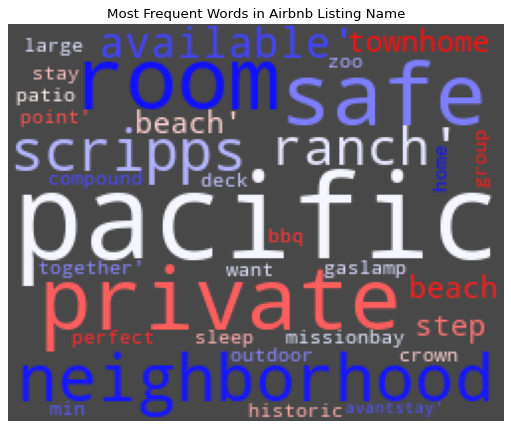

In [15]:
#Airbnb İlan Adındaki En Sık Geçen Kelimeler
# İsim sütunundaki tüm değerlerin bir dizisini oluşturur.
name = tokenized_text['name'].values

# create wordcloud
name_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(name))

# show fig
figure(figsize=(8, 8), dpi=80)
plt.imshow(name_wordcloud)
plt.title('Most Frequent Words in Airbnb Listing Name')
plt.axis('off')

# name_wordcloud.to_file('images/wordcloud_name.png')
plt.show()

#### Summary

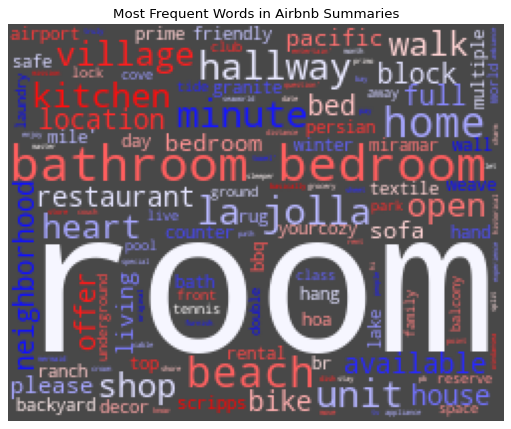

In [16]:
#Airbnb Özetlerinde En Sık Geçen Kelimeler
# creates an array of all values in the name column
summary = tokenized_text['summary'].values

# create wordcloud
summary_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(summary))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(summary_wordcloud)
plt.title('Most Frequent Words in Airbnb Summaries')
plt.axis('off')

# summary_wordcloud.to_file('images/wordcloud_summary.png')
plt.show()

#### Space

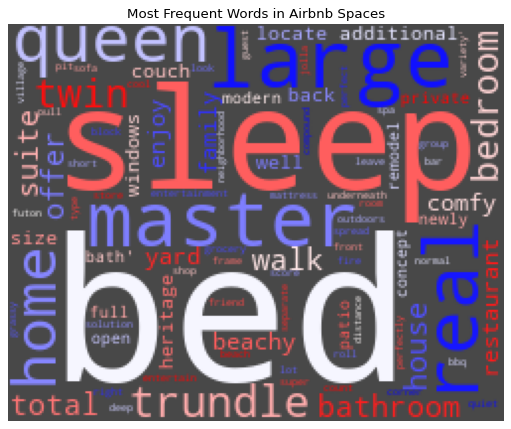

In [17]:
# Airbnb Mekanlarında En Sık Geçen Kelimeler
# creates an array of all values in the name column
space = tokenized_text['space'].values

# create wordcloud
space_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(space))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(space_wordcloud)
plt.title('Most Frequent Words in Airbnb Spaces')
plt.axis('off')

# space_wordcloud.to_file('images/wordcloud_space.png')
plt.show()

#### Description

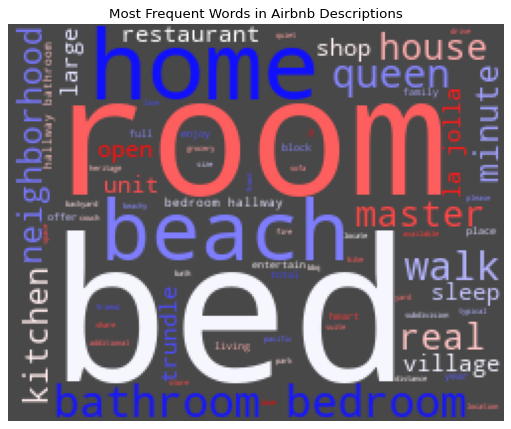

In [18]:
#Airbnb Açıklamalarında En Sık Geçen Kelimeler
# creates an array of all values in the name column
description = tokenized_text['description'].values

# create wordcloud
description_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(description))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(description_wordcloud)
plt.title('Most Frequent Words in Airbnb Descriptions')
plt.axis('off')

# description_wordcloud.to_file('images/wordcloud_description.png')
plt.show()

#### Neighborhood Overview

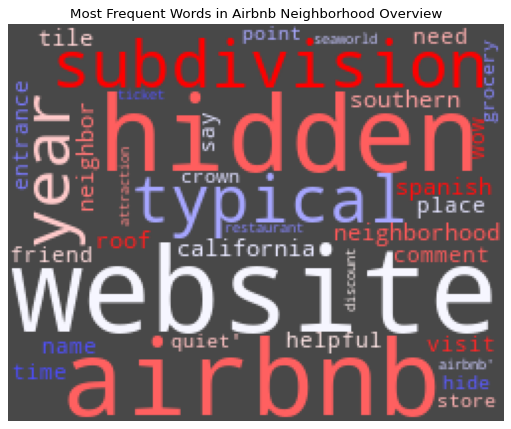

In [19]:
#Airbnb Mahalle Genel Bakışında En Sık Geçen Kelimeler
# creates an array of all values in the name column
neighborhood = tokenized_text['neighborhood_overview'].values

# create wordcloud
neighborhood_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(neighborhood))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(neighborhood_wordcloud)
plt.title('Most Frequent Words in Airbnb Neighborhood Overview')
plt.axis('off')

# neighborhood_wordcloud.to_file('images/wordcloud_neighborhood.png')
plt.show()

#### Transit

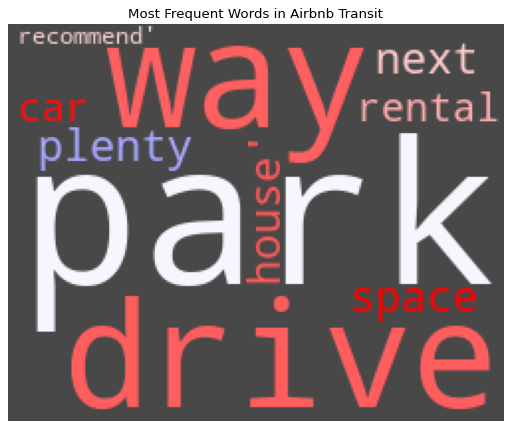

In [20]:
#Airbnb Ulaşımında En Sık Geçen Kelimeler
# creates an array of all values in the name column
transit = tokenized_text['transit'].values

# create wordcloud
transit_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(transit))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(transit_wordcloud)
plt.title('Most Frequent Words in Airbnb Transit')
plt.axis('off')

# transit_wordcloud.to_file('images/wordcloud_transit.png')
plt.show()

#### Interaction

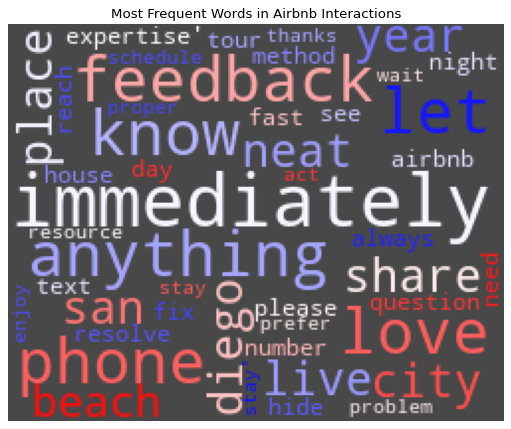

In [21]:
#Airbnb Etkileşimlerinde En Sık Geçen Kelimeler
# creates an array of all values in the name column
interaction = tokenized_text['interaction'].values

# create wordcloud
interaction_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(interaction))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(interaction_wordcloud)
plt.title('Most Frequent Words in Airbnb Interactions')
plt.axis('off')

# interaction_wordcloud.to_file('images/wordcloud_interaction.png')
plt.show()

#### Amenities

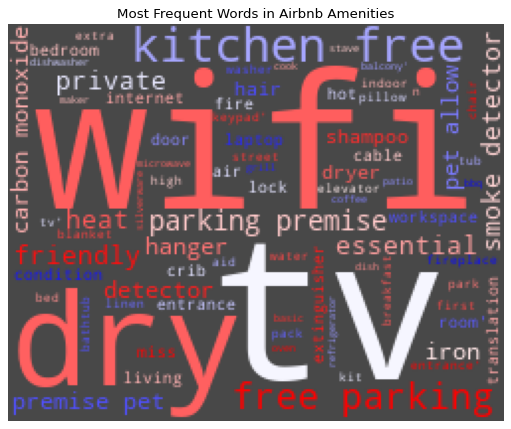

In [22]:
#Airbnb Olanaklarında En Sık Geçen Kelimeler
# creates an array of all values in the name column
amenities = tokenized_text['amenities'].values

# create wordcloud
amenities_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(amenities))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(amenities_wordcloud)
plt.title('Most Frequent Words in Airbnb Amenities')
plt.axis('off')

# amenities_wordcloud.to_file('images/wordcloud_amenities.png')
plt.show()

#### Host About

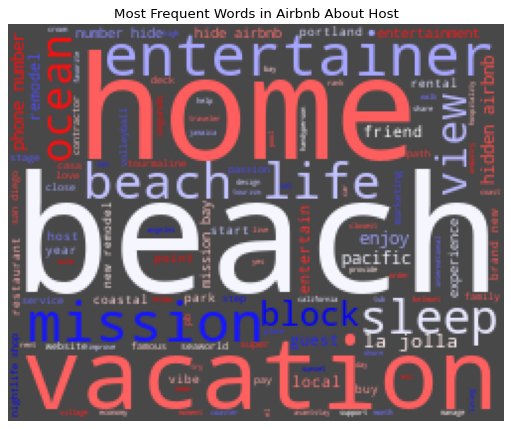

In [23]:
#Airbnb Ev Sahibi Hakkında En Sık Geçen Kelimeler
# creates an array of all values in the name column
host = tokenized_text['host_about'].values

# create wordcloud
host_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(host))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(host_wordcloud)
plt.title('Most Frequent Words in Airbnb About Host')
plt.axis('off')

# host_wordcloud.to_file('images/wordcloud_host.png')
plt.show()

### Bulgular

- Çoğu ilan, plajda manzaralı ve resim gibi güzel olarak tanımlanır (ya da cennetvari bir varyasyonu).

- Birçok ilan ironik bir şekilde "gizli"dir.

- Wi-Fi, TV, otopark ve büyük yataklar mutlaka olmalı!

- Ev sahiplerinin, Airbnb kiralayacak kadar bol zamanı olmalı, çünkü yan işlerinde de eğlence sektörüyle ilgileniyorlar.

## Duygu Analizi

Bir sonraki analiz için, şimdi metin alanları üzerinde duygu analizi yapacağız. Duygu analizi, Airbnb ilanlarının genellikle nasıl tanımlandığı hakkında fikir edinmemizi sağlar. Duygu puanlarını anlamanın süreci şu şekilde açıklanmıştır:

1. **TextBlob Modülü:** Bir cümledeki kelimelerin duygu puanlarını belirleme yeteneği sağlar.
2. **Duygu Etiketleri:** Bir korpus içindeki her kelime, kutupsallık ve öznelilik açısından etiketlenir.
- **Kutupsallık:** Bir kelimenin ne kadar olumlu veya olumsuz olduğu; -1 en olumsuz, +1 en olumlu
- **Öznelilik:** Bir kelimenin ne kadar öznel veya görüşe dayalı olduğu; 0 gerçek, +1 bir görüş

In [24]:
from textblob import TextBlob

In [25]:
# Her bir sütunun kutupsallık (polarity) ve öznelik (subjectivity) değerlerini hesapla.
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# get list of column names 
col_names = list(sd_text.columns)
# just get the relevant text columns
col_names = col_names[2:]

for col in col_names:
    tokenized_text[col+'_polarity'] = tokenized_text[col].apply(pol)
    tokenized_text[col+'_subjectivity'] = tokenized_text[col].apply(sub)
    
tokenized_text.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,amenities,host_about,name_polarity,name_subjectivity,summary_polarity,summary_subjectivity,space_polarity,space_subjectivity,description_polarity,description_subjectivity,neighborhood_overview_polarity,neighborhood_overview_subjectivity,notes_polarity,notes_subjectivity,transit_polarity,transit_subjectivity,access_polarity,access_subjectivity,interaction_polarity,interaction_subjectivity,house_rules_polarity,house_rules_subjectivity,amenities_polarity,amenities_subjectivity,host_about_polarity,host_about_subjectivity
0,33159143,https://www.airbnb.com/rooms/33159143,private room safe neighborhood scripps ranch,house yourcozy room scripps ranch decor safe f...,full bed private bath,house yourcozy room scripps ranch decor safe f...,neighborhood typical southern california spani...,have alarm system choose use i supply butane b...,park drive way plenty space next house,kitchen din room living room very comfortable ...,i live san diego year love share neat place ci...,name,wifi kitchen free parking premise heat dryer s...,retire businessman year community be se asia i...,0.25,0.4375,0.343750,0.375000,0.17500,0.46250,0.185178,0.438725,-0.038889,0.388889,0.0,0.0,0.0,0.0,0.52,1.0,0.378788,0.566667,0.000000,0.0,0.133333,0.491667,0.16,0.380000
1,17138468,https://www.airbnb.com/rooms/17138468,not available,available only winter prime la jolla village l...,,available only winter prime la jolla village l...,,,,,,,tv wifi air condition kitchen free parking pre...,quiet considerate,-0.20,0.4000,0.126623,0.492857,0.00000,0.00000,0.126623,0.492857,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.141667,0.515000,0.00,0.333333
2,21898446,https://www.airbnb.com/rooms/21898446,townhome pacific beach,hi basically rent master month move date room ...,,hi basically rent master month move date room ...,,,,,,,tv wifi kitchen free parking premise pet allow...,,0.00,0.0000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.111111,0.591667,0.00,0.000000
3,25948680,https://www.airbnb.com/rooms/25948680,spacious furnish br ton amenaties,stuff go dishwasher unit small porch closet re...,lobby provide free coffee building door lock n...,stuff go dishwasher unit small porch closet re...,college area,,street green line trolly stop sdsu freeway ent...,everything second bedroom apartment vacant lock,,,wifi air condition pool kitchen free parking p...,,0.00,0.0000,0.005506,0.274256,0.29375,0.74375,0.072789,0.390646,0.000000,0.000000,0.0,0.0,-0.2,0.3,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.258333,0.558333,0.00,0.000000
4,1756516,https://www.airbnb.com/rooms/1756516,spacious luxury retreat,nicely furnished great location block beach be...,,nicely furnished great location block beach be...,coastal town great travel destination,,bus line,,business hour,pet clean healthy,tv wifi kitchen free parking premise elevator ...,life short enjoy,0.00,0.0000,0.762500,0.875000,0.00000,0.00000,0.770000,0.850000,0.800000,0.750000,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.433333,0.6,0.325000,0.825000,0.20,0.400000


### Her bir özellik için toplam kutupsallık (polarity) ve öznelik (subjectivity) değerlerinin bulunduğu yeni bir veri çerçevesi oluştur.
 Make a new dataframe of aggregate polarity & subjectivity for each feature

In [26]:
# define columns
columns = ['Column_Name','Polarity', 'Subjectivity']

# get a list of average polarity and subjectivity for each column
polarity_avg = [tokenized_text[col+'_polarity'].mean() for col in col_names]
subjectivity_avg = [tokenized_text[col+'_subjectivity'].mean() for col in col_names]

#Her bir sütun özelliği için kutupsallık (polarity) ve öznelik (subjectivity) ortalamalarını içeren yeni bir veri çerçevesi oluştur.
sentiment_df = pd.DataFrame({'Column_Name': col_names, 'Polarity': polarity_avg, 'Subjectivity': subjectivity_avg}, 
                            index = col_names, 
                            columns = columns)

sentiment_df

,Column_Name,Polarity,Subjectivity
name,name,0.138129,0.318201
summary,summary,0.261215,0.494715
space,space,0.173663,0.374042
description,description,0.247955,0.496310
neighborhood_overview,neighborhood_overview,0.160586,0.304119
notes,notes,0.084468,0.229170
transit,transit,0.123329,0.226145
access,access,0.084062,0.262785
interaction,interaction,0.180865,0.297007
house_rules,house_rules,0.084642,0.321049


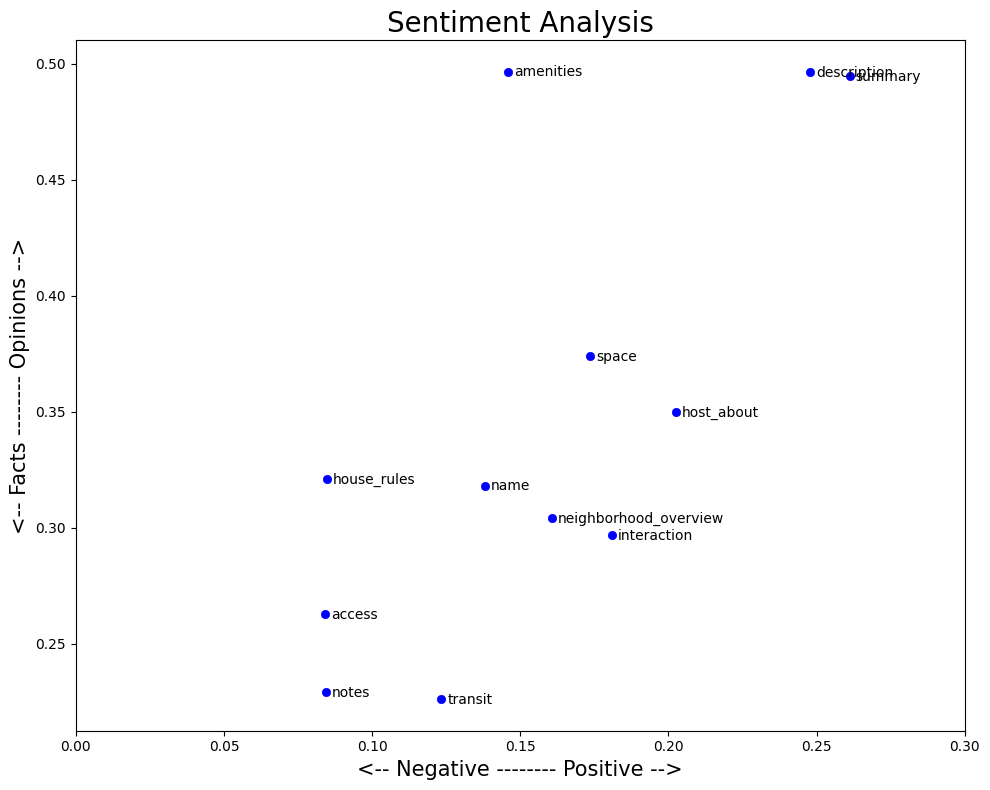

In [27]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))
plt.style.use('bmh')

for index, col in enumerate(sentiment_df.index):
    x = sentiment_df.Polarity.loc[col]
    y = sentiment_df.Subjectivity.loc[col]
    plt.scatter(x, y, color='blue')
    plt.text(x+.002, y-0.002, sentiment_df['Column_Name'][index], fontsize=10)
    plt.xlim(0, 0.3) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.tight_layout()
plt.show()


### Çıkarımlar

- Airbnb ilanları, açıklamalar ve özetler söz konusu olduğunda genellikle olumlu bir izlenim bırakmaktadır. Bu, mantıklıdır çünkü ev sahipleri insanların Airbnb'lerinde kalmalarını teşvik etmek ister ve olumlu bir açıklama yapmak faydalıdır. Ancak, bu açıklamalar genellikle görüşlere dayalıdır.
- Erişim, notlar ve ulaşım gibi gerçeklere dayalı sütunlar, beklenildiği gibi gerçekleri yansıtır.
- İlginç bir şekilde, olanakların oldukça görüşe dayalı olduğu görülmektedir. Olanakların daha çok gerçeklere dayalı olması beklenirdi.